<a href="https://colab.research.google.com/github/ziedjouini/machine-learning/blob/main/Linear_regression_2_Multivariate_M_K_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)

# Multivariate linear regression with Scikit-Learn

The equation of an univariate linear regresion is a line : aX +b

The equation of a multivariate linear regression with 2 variables is a plan : aW + bX + c

The equation of a multivariate linear regression with n variables is a hyperplan : a1 X1 + a2 X2 + .... + an Xn + b


## Let's start with 2 variables
With Plotly express, show a [3D scatterplot ](https://plotly.com/python/plotly-express/#3d-coordinates)with :
- X-axis : MAX temperature
- Y-axis : MIN temperature
- Z-axis : Sunhours


In [ ]:
# Complete x, y and z in the script below:

px.scatter_3d(x = df_weather['MAX_TEMPERATURE_C'], 
              y =  df_weather['MIN_TEMPERATURE_C'], 
              z= df_weather['SUNHOUR'], 
              data_frame=df_weather)


Is it hard to read the 3D scatterplot ? You can move it with your mouse.

### Let's predict
You have to predict the MAX temperature from 2 variables :
- MIN temperature
- Sunhours

Hey, it's the reason why X has 2 brackets and is uppercase and y has a simple bracket and is lowercase . It can take multiple variables (X) to predict only one target (y). 

**Remember to save the result of your prediction in a new column 'predict'.**

In [ ]:
# import skealearn module
from sklearn.linear_model import LinearRegression

# Your code here :
X = df_weather[['MIN_TEMPERATURE_C','SUNHOUR']]
y = df_weather['MAX_TEMPERATURE_C']



# launch the functon 
my_model = LinearRegression()
# train the model 
my_model.fit(X,y)
# get the coef
coeff = my_model.coef_
intercept = my_model.intercept_
coeff
intercept

# get the score 
my_model.score(X,y)

# predict the model 
df_weather['predict'] = my_model.predict(X)

In [ ]:
df_weather['predict'] 

0       8.980922
1      12.353602
2       7.410233
3       4.037552
4       6.421559
         ...    
360    17.296971
361    11.161599
362     9.387580
363    11.364928
364    11.364928
Name: predict, Length: 365, dtype: float64

### Let's visualize
With Plotly express, show a 3D scatterplot with :

- X-axis : your new 'predict' column
- Y-axis : MIN temperature
- Z-axis : Sunhours



In [ ]:
# Your code here :

fig = px.scatter_3d(df_weather, 
                      x='predict',
                      y='MIN_TEMPERATURE_C',
                      z='SUNHOUR')

fig.show()

**Move the cube with your mouse. Hey your 3D-scatterplot has a special shape : it's a plan !**

## Multivariate linear regressions with N-variables
Make a prediction with the maximum number of variables. But beware : 
- variables must be numeric
- your target (MAX temperature) should not be present in variables

Store your prediction in a new column 'predict2'.

In our 3D human vision, we can't represent a hyperplan. But, let's trust in our computer, it can calculate. So trust it and show a simple scatterplot with :
- X-axis : Date
- Y-axis : MAX temperatures in blue dots and 'predict2' in orange dots

Expected result:

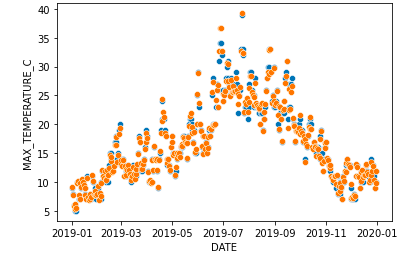

In [ ]:
df_weather

In [ ]:
# Your code here :
from sklearn.linear_model import LinearRegression 
X= df_weather[['MIN_TEMPERATURE_C',	'WINDSPEED_MAX_KMH',	'TEMPERATURE_MORNING_C',	'TEMPERATURE_NOON_C',	'TEMPERATURE_EVENING_C'	,'PRECIP_TOTAL_DAY_MM']]
y = df_weather['MAX_TEMPERATURE_C']

# lauch the method 
my_model = LinearRegression()
# train my model 
my_model.fit(X,y)
# get the coef
my_model.coef_
# get the intercept
my_model.intercept_
# get the score
my_model.score(X,y)
# get the prediction 
df_weather['predict_2'] = my_model.predict(X)

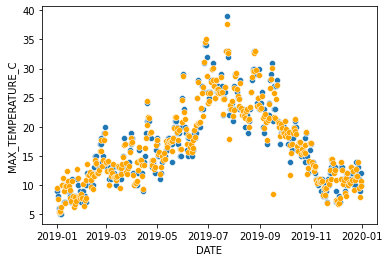

In [ ]:
# draw a sns plot

df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])
my_scatter = sns
my_scatter.scatterplot(data=df_weather,
                       x='DATE',
                       y='MAX_TEMPERATURE_C')


my_scatter.scatterplot(data=df_weather,
                       x='DATE',
                       y='predict_2',
                       color='orange')




You can read coefficient for each column with the attribute `.coef_`. Which column has the biggest coefficient ?

In [ ]:
# Your code here :
my_dict={}
for col , coef in zip(X.columns, my_model.coef_):
  my_dict[col] = coef

key= ''
value =  max(my_dict.values())
for k,v in my_dict.items():
  if v == value:
    key = k




print(f'the bisggest coefficient is : {key , value}')


the bisggest coefficient is : ('TEMPERATURE_NOON_C', 0.5493016540971641)
